## EN2550 Assignment 1 
### 190484T - Rajapaksha R.M.P.A.P.

In [2]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

### Question 1

Text(0.5, 1.0, 'Transformed Image')

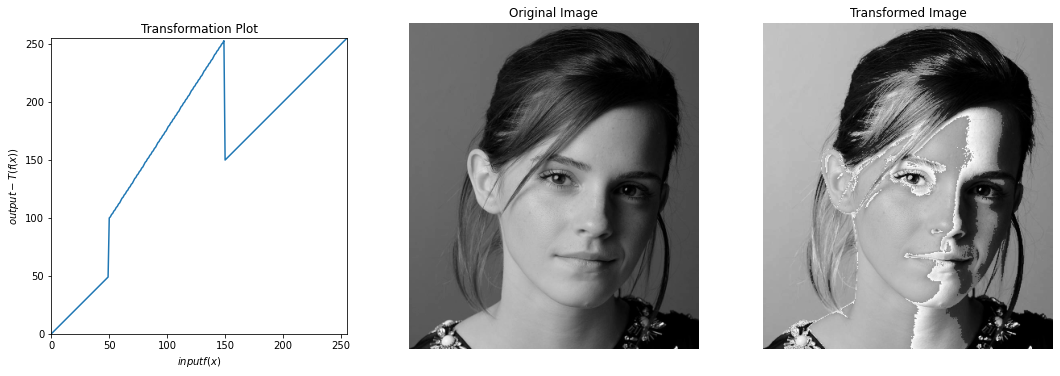

In [13]:
# ************************ question 1 **************************

# opening the image 
im = cv.imread("emma_gray.jpg", cv.IMREAD_REDUCED_GRAYSCALE_2)

# creating the transform 
t1 = np.arange(0, 50, 1)
t2 = np.arange(100, 255, 155/100)
t3 = np.arange(150, 255+1, 1)
t = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)

# perform the intensity transformation 
im_trans = cv.LUT(im, t)

# plotting the transform and visualizing images 
fig, ax = plt.subplots(1, 3, figsize = (18, 6))
ax[0].plot(t)
ax[0].set_xlim(0, 255); ax[0].set_ylim(0, 255)
ax[0].set_xlabel("$input f(x)$"); ax[0].set_ylabel("$output - T(f(x))$")
ax[0].set_aspect("equal")
ax[0].set_title("Transformation Plot")

ax[1].imshow(im, cmap = 'gray')
ax[1].axis('off')
ax[1].set_title("Original Image")

ax[2].imshow(im_trans, cmap = 'gray')
ax[2].axis('off')
ax[2].set_title("Transformed Image")

### Question 2

The pixel intensity range for white and gray matter can be decided by using trackbars provided by OpenCV. 

Here, the pixel intensity range of [184, 255] is roughly occupied by white matter, and the range of [134, 180] is for gray matter.

Therefore, to accentuate a particular region, the other intensity values can be mapped to black. 

In [12]:
# # ************************ question 2 **************************

# # using trackbars to decide the range of pixel intensity for white and gray matter.
# def empty(arg): 
#     pass 

# im = cv.imread("brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
# cv.namedWindow("Original")
# cv.imshow("Original", im)

# cv.namedWindow("Trackbars")
# cv.resizeWindow("Trackbars", 300, 100)
# cv.createTrackbar("intensity min", "Trackbars", 0, 255, empty)
# cv.createTrackbar("pixel intensity max", "Trackbars", 255, 255, empty)

# while True:
#     intens_min = cv.getTrackbarPos("intensity min", "Trackbars")
#     intens_max = cv.getTrackbarPos("pixel intensity max", "Trackbars")

#     mask = cv.inRange(im, intens_min, intens_max)

#     cv.imshow("mask", mask)
#     cv.waitKey(10)
    

Text(0.5, 1.0, 'Gray Matter Accentuated')

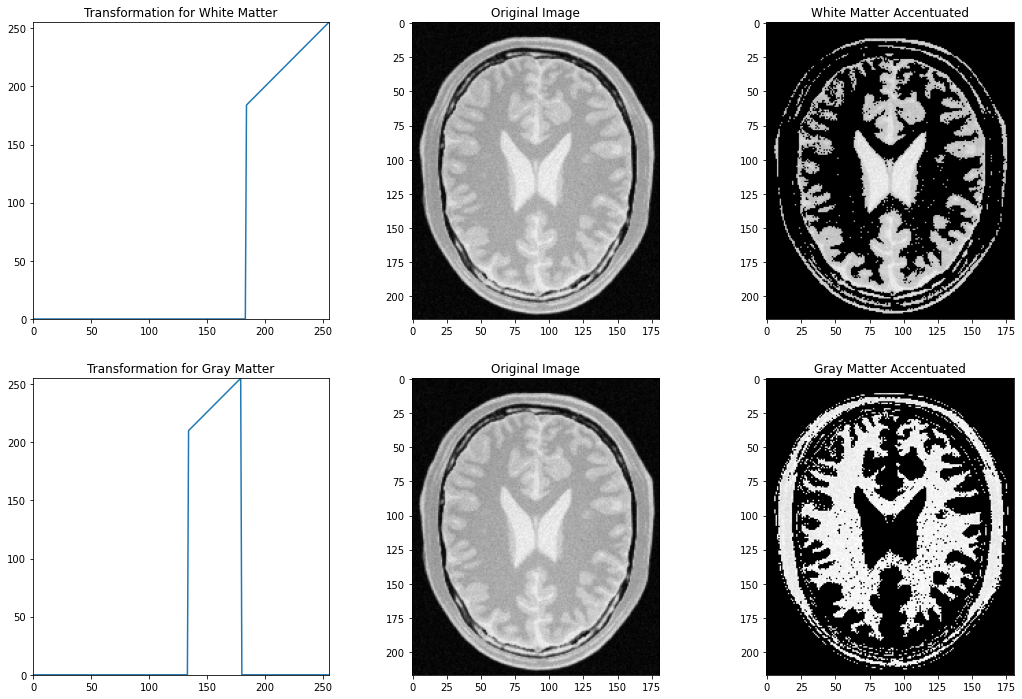

In [15]:
# intensity transformation for white matter 
arr = list(range(256))
for i in range(184): arr[i] = 0
t_w = np.array(arr)

# applying the transformation
white_matter = cv.LUT(im, t_w)

# intensity transformation for gray matter 
arr = list(range(256))
for i in range(134): arr[i] = 0
for i in range(134, 181): arr[i] += (256-180)
for i in range(181, 256): arr[i] = 0
t_g = np.array(arr).astype(np.uint8)

# applying the transformation
gray_matter = cv.LUT(im, t_g)

fig, ax = plt.subplots(2, 3, figsize = (18, 12))

ax[0, 0].plot(t_w); ax[0, 0].set_xlim(0, 255); ax[0, 0].set_ylim(0, 255)
ax[0, 0].set_title("Transformation for White Matter")
ax[0, 1].imshow(im, cmap='gray', vmin=0, vmax=255); 
ax[0, 1].set_title("Original Image")
ax[0, 2].imshow(white_matter, cmap='gray', vmin=0, vmax=255)
ax[0, 2].set_title("White Matter Accentuated")

ax[1, 0].plot(t_g); ax[1, 0].set_xlim(0, 255); ax[1, 0].set_ylim(0, 255)
ax[1, 0].set_title("Transformation for Gray Matter")
ax[1, 1].imshow(im, cmap='gray', vmin=0, vmax=255); 
ax[1, 1].set_title("Original Image")
ax[1, 2].imshow(gray_matter, cmap='gray', vmin=0, vmax=255)
ax[1, 2].set_title("Gray Matter Accentuated")